In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install Wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk

In [5]:
reviews=pd.read_csv(r'C:\Users\neeraj\K8 Reviews v0.2.csv')

In [6]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
reviews.shape

(14675, 2)

In [8]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [9]:
reviews.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

### Get insights from the reviews
1. Use regular expressions
2. word cloud
3. Bar graph

#### use regular expressions to get the insights about the reviews


In [10]:
# Find out the reviews which have some numbers followed by the gb
count=0
for review in reviews.review.values:
    review=review.strip()
    result=re.findall("\d+gb",review)
    if result:
        print(review)
        count+=1

Nice performance with 4gb RM and 64gb inbuilt memory
very bad and when lenovo and moto merged the standard of lenovo went to a worst condition. the 4gb decacore do nothing....dont buy it. very bad.....
Very nice looking phone.. Nice build quality... Awesome product ... In this price range it is a best phone... Nice bettory life and fast charging... It has all specifications ... Dual camera... Nice fingerPrint scanner... Awesome work with 4gb/64gb combination... Realy value for money...
It gets very hot while using. I was using Lenovo K4 for last one year and was more satisfied with that rather this one @ 13999. Main drawback of this phone arebeautiful_ Cast (screen mirror) doesn't work. Bluetooth is also disturbing. Touch screen is not as sensitive as it should be with 4gb ram and 64 GB internal memory with 10 core processer. Display got broken very early with in two months of use. It's very normal and not as strong as k4. Hand grip is not good. Voice clarity not good and Dolby sound i

In [11]:
print(count) # finding the number of reviews with a number followed by gb

81


In [12]:
# Find out the reviews which have some numbers followed by the /-
count=0
for review in reviews.review.values:
    review=review.strip()
    result=re.findall("\d+/-",review)
    if result:
        print(review)
        count+=1

Firstly product not delivered on time dissatisfied 2 weeks.Secondly Android 7.1.1 naugat doesn't have call recording optionThirdly when selling product cost was 13999/- now why drastically dropped. 10999/-Fourthly when talking over the phone feels like nerve pulling to much radiation need immediate fix on this matter as it's safety and security of customer.Fifthly if any issues in hardware issues please let us know the service centers location. And please ensure hardware availability should be there at any time when customers booked.Finally as discribed about product all features are ok no issues found as mentioned earlier if call recording option would have added the this product would have been met the expectations.Camera quality is good not bad snap attached.
Bad quality of screen.Mobile was just fall from 1 ft. of height & screen was brokenCustomer care of Lenovo Jabalpur (MP) is not responding regarding the replacement of screen even on paid service basis. I have deposited Rs. 420

In [13]:
print(count)

28


# Get the wordcloud

1. Combine all the reviews in a single string
2. Instantiate wordcloud
3. generate the word cloud

In [14]:
from wordcloud import WordCloud

In [15]:
reviews_combined=" ".join(reviews.review.values) # it picks up every review from this array ad combies them into a single list.

In [16]:
l=['a','b','c']
" ".join(l)

'a b c'

In [17]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [18]:
word_cloud=WordCloud().generate(reviews_combined) # WordCloud() here is constructor

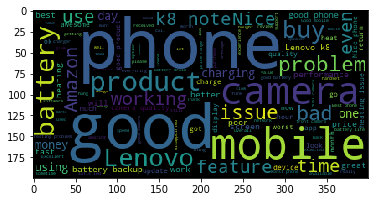

In [19]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [20]:
word_cloud=WordCloud(width=800,height=800,background_color='white',max_words=150).generate(reviews_combined)

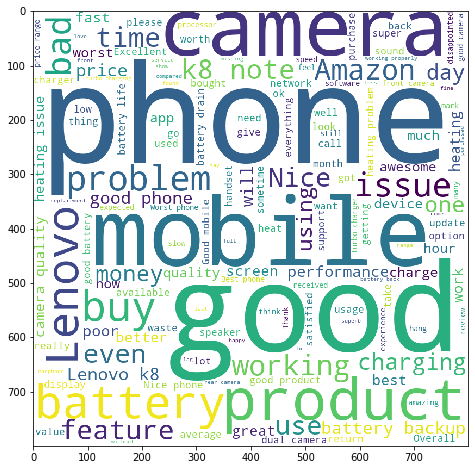

In [21]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [22]:
from nltk.probability import FreqDist
all_terms=reviews_combined.split(" ")
fdist=FreqDist(all_terms)

In [23]:
fdist

FreqDist({'is': 10151, 'the': 5565, 'not': 5162, 'and': 5078, 'phone': 4766, 'to': 4627, 'this': 3833, 'in': 3445, 'I': 3418, 'good': 3348, ...})

In [24]:
type(fdist)

nltk.probability.FreqDist

In [25]:
df_dist=pd.DataFrame(fdist.items(),columns=['words','freq'])

In [26]:
df_dist.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [27]:
df_dist.sort_values(ascending=False,by='freq').head()

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766


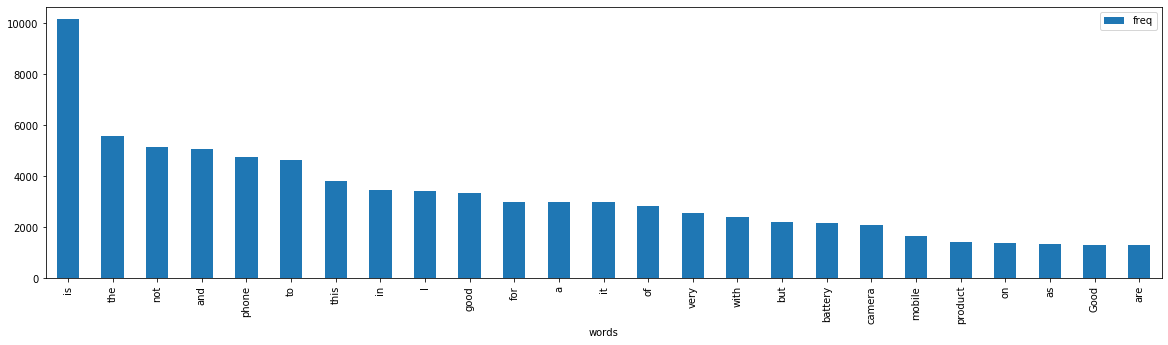

In [28]:
%matplotlib inline
df_dist.sort_values(ascending=False,by='freq').head(25).plot.bar(x='words',y='freq',figsize=(20,5))

### problem with these visuals.Too many distinct words in my corpus of reviews
  1. Text is non uniform case.
  2. punctuations presentin the text
  3. there are language connectors in the text - stop words
  4. words with different form/tenses

# Text cleaning (general techiques)

### case normalization

In [29]:
text='Hi welcome To the cOurSe oF texT AalyTics'
text.lower()

'hi welcome to the course of text aalytics'

### Tokenizing
- It is smallest unit of text data -->word,group of words,sentences,paragraphs...

In [30]:
print(text.split(' '))

['Hi', 'welcome', 'To', 'the', 'cOurSe', 'oF', 'texT', 'AalyTics']


In [31]:
text1="This hotel is awesome, isn't it? it couldn't have been better place than this"
print(text1.split(' '))

['This', 'hotel', 'is', 'awesome,', "isn't", 'it?', 'it', "couldn't", 'have', 'been', 'better', 'place', 'than', 'this']


 
NLTK offers different tokenizers
1. word_tokenize
2. tweettokenizer
3. regexp_tokenizer

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.tokenize import word_tokenize

In [35]:
print(text1)

This hotel is awesome, isn't it? it couldn't have been better place than this


In [36]:
print(word_tokenize(text1))

['This', 'hotel', 'is', 'awesome', ',', 'is', "n't", 'it', '?', 'it', 'could', "n't", 'have', 'been', 'better', 'place', 'than', 'this']


In [37]:
from  nltk.tokenize import sent_tokenize
sentence='hi my name is Mr. Neeraj kumar. I am learning NLP with python. Its is very intresting!'
sent_tokenize(sentence)

['hi my name is Mr. Neeraj kumar.',
 'I am learning NLP with python.',
 'Its is very intresting!']

In [38]:
print(re.sub("[^\w\s]+","",text1))

This hotel is awesome isnt it it couldnt have been better place than this


In [39]:
text2="this is a good ho,tel, i li.ked it very muc!h. didn't i?"
print(word_tokenize(text2))

['this', 'is', 'a', 'good', 'ho', ',', 'tel', ',', 'i', 'li.ked', 'it', 'very', 'muc', '!', 'h', '.', 'did', "n't", 'i', '?']


In [40]:
text2=re.sub("[^\w\s]+","",text2)

In [41]:
print(word_tokenize(text2))

['this', 'is', 'a', 'good', 'hotel', 'i', 'liked', 'it', 'very', 'much', 'didnt', 'i']


In [42]:
text3="LMAO I am not able to use the internet #Stopusing @ITTEAM" #tweet

In [43]:
print(word_tokenize(text3))

['LMAO', 'I', 'am', 'not', 'able', 'to', 'use', 'the', 'internet', '#', 'Stopusing', '@', 'ITTEAM']


In [44]:
# here if we use word_tokenize we can see that it seperates # and @ which is important in any tweet

In [45]:
from nltk.tokenize import TweetTokenizer

In [46]:
tweet_tok=TweetTokenizer()

In [47]:
print(tweet_tok.tokenize(text3))

['LMAO', 'I', 'am', 'not', 'able', 'to', 'use', 'the', 'internet', '#Stopusing', '@ITTEAM']


In [48]:
text4="I am #killing it, luv mah lyf YOLO LOL :D :D <3 @raju"

In [49]:
print(word_tokenize(text4))

['I', 'am', '#', 'killing', 'it', ',', 'luv', 'mah', 'lyf', 'YOLO', 'LOL', ':', 'D', ':', 'D', '<', '3', '@', 'raju']


In [50]:
print(tweet_tok.tokenize(text4))

['I', 'am', '#killing', 'it', ',', 'luv', 'mah', 'lyf', 'YOLO', 'LOL', ':D', ':D', '<3', '@raju']


In [51]:
message="Living life king size #Chilling #lifegoals #yolo #waderlust"
# now we have to tokenize the message using only hastags

In [52]:
from nltk.tokenize import regexp_tokenize

In [53]:
regexp_tokenize(message,'#[\w]+')

['#Chilling', '#lifegoals', '#yolo', '#waderlust']

Summary of tokenizers which we have learnt so far
1. word_tokenize is a generic tokenizer,which seperates words and punctuations. Note-Apostrophe is not considered as punctuation
2. Tweet tokenize is specifically used when dealig with social media text consisting of #,@,emoticons
3. regexp_tokenize is used when we are interested in few specific words which follows a common pattern,like extracting all hastags from tweets,addressigs(@) from tweets or hyperlinks from the tweets

### text cleaning on the amazon reviews

In [54]:
all_terms=word_tokenize(reviews_combined.lower())
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [55]:
# findind the number of distinct words/tokens in our dataset
len(set(all_terms))

19159

In [56]:
fdist=FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

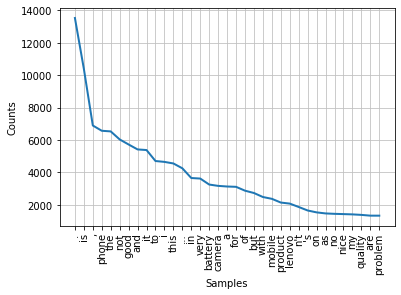

In [57]:
fdist.plot(35)
plt.show()

In [58]:
# The first and last part of the graph has punctuations,stopwords with most frequency.So we need to remove them
# we ca do that by a> using re.sub  b> by making a list of punctuations and then running a for loop through it

In [59]:
reviews_combined_clean=re.sub("[^\w\s]+","",reviews_combined)
all_terms=word_tokenize(reviews_combined_clean.lower())

In [60]:
len(set(all_terms)) # number has decreased as the punctuations have been removed

18818

In [61]:
from string import punctuation

In [62]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [63]:
# nltk.download('stopwords')

In [64]:
from nltk.corpus import stopwords

In [65]:
stop_nltk=stopwords.words('english')
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
txt="I am not able to work today,I will be taking off"
clean_word=[word for word in word_tokenize(txt.lower()) if word not in list(punctuation) and word not in stop_nltk]
clean_word

['able', 'work', 'today', 'taking']

In [67]:
stop_updated=stop_nltk+['mobile','phone','lenovo','K8','note']

In [68]:
all_terms1=[term for term in all_terms if term not in stop_updated and len(term)>2]

In [69]:
len(set(all_terms1))

18297

In [70]:
print(all_terms1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'dischargedthis', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'chargeddont', 'know', 'survive', 'making', 'full', 'usplease', 'dont', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', 'highly', 'disappointing', 'amazon', 'telling', 'dont', 'buyim', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allotreally', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problemsand', 'hanging', 'problems', 'noteso', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', '

# Stemming

1. A technique which takes the word to its root form.
2. Its rule based and removes suffixes from the word.
3. The stemmed word might not be part of the dictionary.
- 2 typs of stemmers:
 1. porter stemmer - old stemmer developed by martin porter
 2. snowball stemmer- supports multiple language, faster and better than porter stemmer

#### difference between different types of stemmers
At the very basics of it, the major difference between the porter and lancaster stemming algorithms is that the lancaster stemmer is significantly more aggressive than the porter stemmer. The three major stemming algorithms in use today are Porter, Snowball(Porter2), and Lancaster (Paice-Husk), with the aggressiveness continuum basically following along those same lines. Porter is the least aggressive algorithm, with the specifics of each algorithm actually being fairly lengthy and technical. Here is a break down for you though:

Porter: Most commonly used stemmer without a doubt, also one of the most gentle stemmers. One of the few stemmers that actually has Java support which is a plus, though it is also the most computationally intensive of the algorithms(Granted not by a very significant margin). It is also the oldest stemming algorithm by a large margin.

Porter2: Nearly universally regarded as an improvement over porter, and for good reason. Porter himself in fact admits that it is better than his original algorithm. Slightly faster computation time than porter, with a fairly large community around it.

Lancaster: Very aggressive stemming algorithm, sometimes to a fault. With porter and snowball, the stemmed representations are usually fairly intuitive to a reader, not so with Lancaster, as many shorter words will become totally obfuscated. The fastest algorithm here, and will reduce your working set of words hugely, but if you want more distinction, not the tool you would want.

Honestly, I feel that Snowball is usually the way to go. There are certain circumstances in which Lancaster will hugely trim down your working set, which can be very useful, however the marginal speed increase over snowball in my opinion is not worth the lack of precision. Porter has the most implementations though and so is usually the default go-to algorithm, but if you can, use snowball.

In [71]:
from nltk.stem import PorterStemmer , SnowballStemmer

In [72]:
stemmer_p=PorterStemmer()

In [73]:
s_stemmer=SnowballStemmer(language='english')

In [74]:
words=['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+'--->'+stemmer_p.stem(word))

run--->run
runner--->runner
running--->run
ran--->ran
runs--->run
easily--->easili
fairly--->fairli


In [75]:
for word in words:
    print(word+'--->'+s_stemmer.stem(word))

run--->run
runner--->runner
running--->run
ran--->ran
runs--->run
easily--->easili
fairly--->fair


In [76]:
sentence='pythoners are very intelligent and work very pythonly and now they are pythoning their way to success'

In [77]:
print([stemmer_p.stem(word) for word in word_tokenize(sentence.lower())])

['python', 'are', 'veri', 'intellig', 'and', 'work', 'veri', 'pythonli', 'and', 'now', 'they', 'are', 'python', 'their', 'way', 'to', 'success']


In [78]:
print([s_stemmer.stem(word) for word in word_tokenize(sentence.lower())])

['python', 'are', 'veri', 'intellig', 'and', 'work', 'veri', 'python', 'and', 'now', 'they', 'are', 'python', 'their', 'way', 'to', 'success']


# Lemmatization
1. Unlike stemming,lemmatization takes the word to its root form called lemma
2. A lemma of a word is its dictioanry form  or canonical form.
3. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'.
4. Its involves resolving words to its dictioanry form.
5. Lemmatizer in python uses a built in dictionary called 'wordnet' which comprises of a list of words  and their meanngs

In [79]:
#nltk.download('wordnet')

In [80]:
from nltk.stem import WordNetLemmatizer

In [81]:
lemm=WordNetLemmatizer()

In [82]:
text="He was running and eating at same time"

In [83]:
print([lemm.lemmatize(word) for word in  word_tokenize(text.lower())])

['he', 'wa', 'running', 'and', 'eating', 'at', 'same', 'time']


In [84]:
print([lemm.lemmatize(word,pos='n') for word in  word_tokenize(text.lower())])

['he', 'wa', 'running', 'and', 'eating', 'at', 'same', 'time']


In [85]:
# - Lemmatizer removes suffixes on nouns by default ,provided the word after suffix removal  is part of the dictionary
# - Lemmatizer does not remove any suffixes if the resultant word cannot be found in  the ordnet dictioanry
# - lemmatizer is very aggressive in reserving the meaning of the word

In [86]:
print([lemm.lemmatize(word,pos='v') for word in  word_tokenize(text.lower())])

['he', 'be', 'run', 'and', 'eat', 'at', 'same', 'time']


In [87]:
text='He has a habit of swimming and playing long hours in the sun'

In [88]:
print([lemm.lemmatize(word,pos='n') for word in  word_tokenize(text.lower())])

['he', 'ha', 'a', 'habit', 'of', 'swimming', 'and', 'playing', 'long', 'hour', 'in', 'the', 'sun']


In [89]:
print([lemm.lemmatize(word,pos='v') for word in  word_tokenize(text.lower())])

['he', 'have', 'a', 'habit', 'of', 'swim', 'and', 'play', 'long', 'hours', 'in', 'the', 'sun']


In [90]:
words=['charge','charging','charged','charges']
len(set([lemm.lemmatize(word,pos='n') for word in words]))

3

In [91]:
len(set([lemm.lemmatize(word,pos='v') for word in words]))

1

In [92]:
len(set([lemm.lemmatize(word) for word in words]))

3

In [93]:
from nltk.stem import SnowballStemmer
stemmer_s=SnowballStemmer("english")

In [94]:
all_terms1_stemmed=[stemmer_s.stem(word)for word in all_terms1]

In [95]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

In [96]:
all_terms1_lemm=[lemm.lemmatize(word) for word in all_terms1]

In [97]:
print(len(set(all_terms1_stemmed)),len(set(all_terms1_lemm)))

15939 17707


Conclusion
1. Both lemmatization and stemming results in the root form of the word.The only difference is that stemmer results in stemmed word whereas lemmatization results in lemma of actual word.
2. Stemming is faster than lemmatization because a). Lemmatization needs to look up in the in-built dictionary WordNet. b).Requires to know the context of the word to perform lemmatization.
3. For frequency based analysis where the language of the word is not important stemming would result in fewer distinct word than lemmatizer 
4. To apply ML algorithms(not DL algo),frequency based algorithms are used(BagOfWord model) where wors are extracted to form the feature set,a technique which results in fewer words is preferred i.e stemming.
5. Algorithms(DL algo) where context of the word is important ,then lemmatizer is preferred over stemming.

In [98]:
def clean_text(sent):
    #Stripping white spcaes before and after the text
    sent=sent.strip()
    #Replacing multiple spaces with a single space
    result=re.sub("\s+"," ",sent)
    #Replacing non alpha numeric and non space characters with nothing
    result1=re.sub("[^\w\s]+","",result)
    #Normalize case,stemm and remove shorter tokens
    tokens=word_tokenize(result1.lower())
    stemmed=[stemmer_s.stem(term) for term in tokens if term not in stop_updated and len(term)>2]
    #Join all to form a single string which will be returned from the UDF
    res=" ".join(stemmed)
    return res

In [99]:
reviews['clean_review']=reviews.review.apply(clean_text)

In [100]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


Other cleaning which can be performed
1. spell check
2. Treating numbers
3. Language Translators
4. Handling emojis and emoticons

## Wordcloud on cleaned data

In [101]:
reviews_combined_clean=" ".join(reviews.clean_review.values)

In [102]:
reviews_combined_clean[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get dischargedthi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli chargeddont know surviv make full uspleas dont els regret like get cash back alreadi januari good worst everthey chang last problem still amazon return high disappoint amazon tell dont buyim total disappointedpoor batterypoor camerawast money awesom charg heat allotr genuin'

In [103]:
word_cloud=WordCloud(width=800,height=800,background_color='white',max_words=150).generate(reviews_combined_clean)

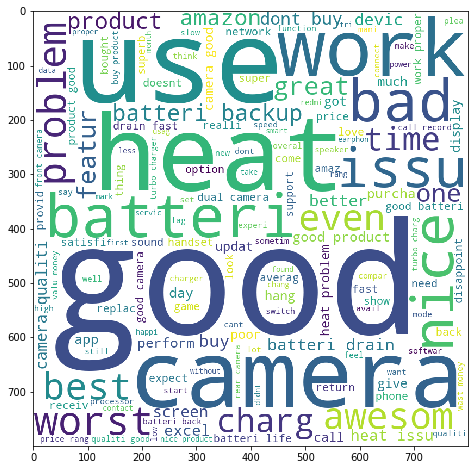

In [104]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph on top 25 words

In [105]:
from nltk.probability import FreqDist
all_terms=word_tokenize(reviews_combined_clean)
fdist=FreqDist(all_terms)

In [106]:
df_dist=pd.DataFrame(fdist.items(),columns=["words","freq"])

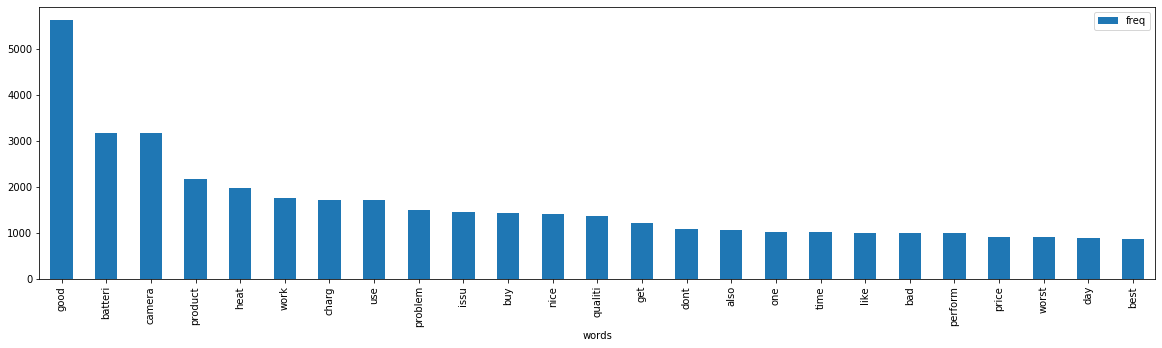

In [107]:
%matplotlib inline
df_dist.sort_values(ascending=False,by="freq").head(25).plot.bar(x="words",y="freq",figsize=(20,5))

## Plot the bar graph of top 25 frequently used bigrams

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
# create a bigram countvectorizer object
bigram_count_vectorizer=CountVectorizer(ngram_range=(2,2),max_features=150) # advisable to use max_features everywhere to avoid errors

In [110]:
x_bigram=bigram_count_vectorizer.fit_transform(reviews['clean_review'])

In [111]:
DTM_bigram=pd.DataFrame(x_bigram.toarray(),columns=bigram_count_vectorizer.get_feature_names())

In [112]:
bigram_count_vectorizer.get_feature_names()[:20]

['4000 mah',
 '4gb ram',
 'also good',
 'back camera',
 'backup good',
 'bad experi',
 'bad product',
 'batteri back',
 'batteri backup',
 'batteri charg',
 'batteri drain',
 'batteri get',
 'batteri good',
 'batteri heat',
 'batteri last',
 'batteri life',
 'batteri perform',
 'batteri problem',
 'best price',
 'build qualiti']

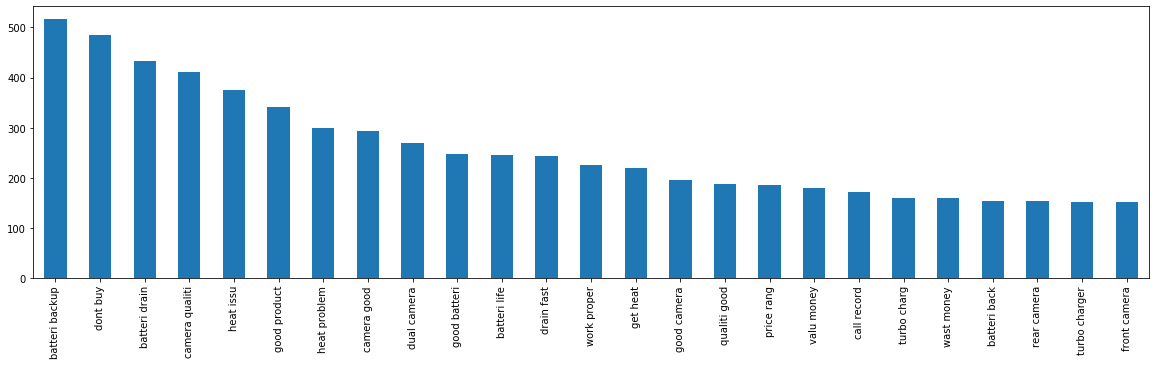

In [113]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))

## Sentiment prediction strategy 1: building our own model based on the sentiment labels

Applying supervised learning on labelled text data - in this case we will leverage the sentiment level which is available along with the text data

steps

- step1: get the X and Y
- step2: converting text into numbers (countvectorizer or tfidfvectorizer)
- step3: split into test and train
- step4: train the model
- step5: test and get the accuracy scores
- step6: make predictions for an input review

In [117]:
X_text=reviews.clean_review.values
Y=reviews.sentiment.values

In [118]:
count_vect=CountVectorizer(max_features=3500)
X=count_vect.fit_transform(X_text)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

#### Applying logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logreg=LogisticRegression()

In [123]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred=logreg.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [128]:
accuracy_score(y_test,y_pred)

0.8473767885532592

#### Applying naive bayes

In [130]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [131]:
gnb=MultinomialNB()

In [132]:
gnb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
y_pred2=gnb.predict(x_test)

In [134]:
accuracy_score(y_test,y_pred2)

0.8435157846922553

In [135]:
# Make predictions:
review1="This is a fantastic mobile but the battery really drains really fast."
review2="Camera is good but when i speak over phone continously over a long time it gets heated up."


In [136]:
review=[review1,review2]

In [138]:
c_review=list(map(clean_text,review))

In [139]:
X_test_new=count_vect.transform(c_review)


In [140]:
Y_test_pred_new=logreg.predict(X_test_new)

In [141]:
Y_test_pred_new

array([1, 0], dtype=int64)